<a href="https://colab.research.google.com/github/crodine/CS-167-Public/blob/main/Project_2_NLP_Rodine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#2 
Your project should address the categories below. 

## Problem:
This project works by taking in a bunch of movie reviews from IMDB with an already determined review sentiment of positive or negative. With this data I will create a series of models to train on the dataset and then determine on a testing set if a review is positive or negative based on the words in the review. The hope with that being if I create a successful model it could be used on new reviews in the future to determine their sentiment based on these already classified ones. 


# Input Pipeline (sklearn):

In [1]:
from google.colab import drive
import pandas
import pylab as pl
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/DATA/IMDB_dataset.csv')
data.head()

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Longest review
- Shortest review

There are 50000 total samples
There are two classes for our target variable, ['positive' 'negative']
25000 of those are positive reviews
25000 of those are negative reviews
The median number of words per review is 15.0
The average number of words per review is 47.75549188156638

The longest review is 387 words long
The shortest review is 1 words long


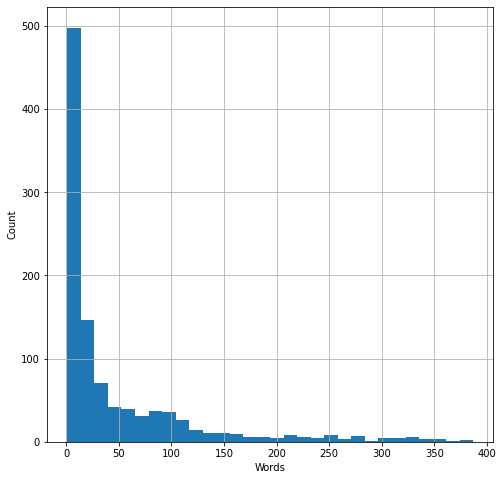

In [16]:
## Use cells here to explore the data:
print("There are",data.shape[0],"total samples")

print("There are two classes for our target variable,",data["sentiment"].unique())

pos = data[ data['sentiment'] == 'positive']
print(pos.shape[0],"of those are positive reviews")

neg = data[ data['sentiment'] == 'negative']
print(neg.shape[0],"of those are negative reviews")

count = data['review'].str.split().apply(len).value_counts()
print("The median number of words per review is",count.median())

print("The average number of words per review is",count.mean())

print()

count.hist(figsize = [8,8],bins=30)
pl.xlabel("Words")
pl.ylabel("Count")

print("The longest review is",count.max(),"words long")
print("The shortest review is",count.min(),"words long")

## Data Preparation

In order to prepare my data before I introduce the model I will do a couple things. Firstly I will clean the data by converting all the reviews into lowercase characters, so that words that start a sentence or are capital for some reason aren't taken by the model as being different. I will also remove stop words in the reviews, those being words like a, the, and, etc which are common words and don't contribute to the sentiment one way or another. This will remove any inaccuarte asserstions from the model and make it more accurate because these words could inaccurately effect my results, as again, they provide no substance to our sentiment target variable.

In [4]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [11]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

In [12]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [13]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [14]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [15]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 5000)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.
